In [ ]:
import pandas as pd
data = pd.read_csv('WELFake_Dataset.csv')
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [ ]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
data = data.rename(columns={'Unnamed: 0': 'id'})


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Assuming 'data' is your DataFrame
# If 'text' column contains non-string elements, you can convert them to string
data['text'] = data['text'].astype(str)

# Function to remove HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = remove_html_tags(text)

    # Remove URLs
    text = remove_urls(text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove extra whitespaces
    text = ' '.join(tokens)

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Display the result
print(data[['text', 'preprocessed_text']])


                                                    text  \
0      No comment is expected from Barack Obama Membe...   
1         Did they post their votes for Hillary already?   
2       Now, most of the demonstrators gathered last ...   
3      A dozen politically active pastors came here f...   
4      The RS-28 Sarmat missile, dubbed Satan 2, will...   
...                                                  ...   
72129  WASHINGTON (Reuters) - Hackers believed to be ...   
72130  You know, because in fantasyland Republicans n...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...   
72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                       preprocessed_text  
0      comment expect barack obama member fukyoflag b...  
1                              post vote hillari alreadi  
2      demonstr gather last night exercis constitut p...  
3      dozen polit activ pastor came privat

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense


In [ ]:
# Tokenization
texts = data['preprocessed_text'].tolist()
labels = data['label'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
maxlen = 100  # Assuming maximum sequence length
sequences = pad_sequences(sequences, maxlen=maxlen)


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)


In [ ]:
# Word2Vec Embedding
import numpy as np

word_vectors = word2vec_model.wv
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]


In [ ]:
# LSTM Model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)  # Convert X_test to a NumPy array
y_test = np.array(y_test)  # Convert y_test to a NumPy array

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model using Keras' built-in method
model.save("LSTM_fake_news_detection_model.h5")
print("Model saved successfully as LSTM_fake_news_detection_model.h5")


Epoch 1/10
1804/1804 [==============================] - 323s 179ms/step - loss: 0.6838 - accuracy: 0.5326 - val_loss: 0.6747 - val_accuracy: 0.5601
Epoch 2/10
1804/1804 [==============================] - 306s 170ms/step - loss: 0.6736 - accuracy: 0.5517 - val_loss: 0.6861 - val_accuracy: 0.5597
Epoch 3/10
1804/1804 [==============================] - 303s 168ms/step - loss: 0.6721 - accuracy: 0.5536 - val_loss: 0.6718 - val_accuracy: 0.5623
Epoch 4/10
1804/1804 [==============================] - 304s 168ms/step - loss: 0.6718 - accuracy: 0.5542 - val_loss: 0.6715 - val_accuracy: 0.5610
Epoch 5/10
1804/1804 [==============================] - 304s 168ms/step - loss: 0.6714 - accuracy: 0.5552 - val_loss: 0.6699 - val_accuracy: 0.5623
Epoch 6/10
1804/1804 [==============================] - 306s 170ms/step - loss: 0.6708 - accuracy: 0.5581 - val_loss: 0.6692 - val_accuracy: 0.5617
Epoch 7/10
1804/1804 [==============================] - 314s 174ms/step - loss: 0.6699 - accuracy: 0.5587 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully as LSTM_fake_news_detection_model.h5


In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


451/451 [==============================] - 40s 89ms/step - loss: 0.6679 - accuracy: 0.5646
Test Accuracy: 0.5646357536315918


In [ ]:
# Predict probabilities for each class
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


451/451 [==============================] - 26s 56ms/step
              precision    recall  f1-score   support

           0       0.53      0.92      0.67      7089
           1       0.74      0.22      0.34      7338

    accuracy                           0.56     14427
   macro avg       0.63      0.57      0.51     14427
weighted avg       0.64      0.56      0.51     14427



In [ ]:
pip install transformers torch


In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [ ]:
# Assuming 'data' is your DataFrame
#data['preprocessed_text'] = data['text'].apply(preprocess_text)


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming binary classification


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Splitting the preprocessed data
train_texts, val_texts, train_labels, val_labels = train_test_split(data['preprocessed_text'], data['label'], test_size=0.2, random_state=42)

# Tokenize text sequences
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=128)

# Create dataset objects
train_dataset = BERTDataset(train_encodings, train_labels.tolist())
val_dataset = BERTDataset(val_encodings, val_labels.tolist())


In [ ]:
!pip install accelerate -U


In [ ]:
!pip install transformers[torch] -U


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save at the end of each epoch to match evaluation_strategy
    logging_steps=10,  # Log metrics every 10 steps
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss


In [ ]:
pip install gensim


In [ ]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

#  'data' has a 'preprocessed_text' column ready from your previous script
sentences = [sentence.split() for sentence in data['preprocessed_text']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Training a Skip-Gram model
model_sg = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Save the model for later use
model_sg.save("skip_gram_model.model")


In [ ]:
import os

# Check current directory for the model file
print("Files in current directory:", os.listdir('.'))

# Load the model to confirm it's saved properly
loaded_model = Word2Vec.load("skip_gram_model.model")
print("Model loaded successfully!")


Files in current directory: ['.config', 'skip_gram_model.model.wv.vectors.npy', 'skip_gram_model.model', 'WELFake_Dataset.csv', '.ipynb_checkpoints', 'skip_gram_model.model.syn1neg.npy', 'sample_data']
Model loaded successfully!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical



In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Ensure your data['preprocessed_text'] is a list of sentences (strings)
sentences = [word_tokenize(text) for text in data['preprocessed_text']]


In [ ]:
# Initialize and train a Skip-Gram model (sg=1)
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Save the model to your directory
model_w2v.save("skip_gram_model.model")


In [ ]:
import os

# Check current directory for the model file
print("Files in current directory:", os.listdir('.'))

# Load the model to confirm it's saved properly
loaded_model = Word2Vec.load("skip_gram_model.model")
print("Model loaded successfully!")


Files in current directory: ['.config', '.ipynb_checkpoints', 'skip_gram_model.model.wv.vectors.npy', 'skip_gram_model.model', 'WELFake_Dataset.csv', 'skip_gram_model.model.syn1neg.npy', 'sample_data']
Model loaded successfully!


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['preprocessed_text'])
sequences = tokenizer.texts_to_sequences(data['preprocessed_text'])

In [ ]:

lengths = [len(x) for x in sequences]
max_length = int(np.percentile(lengths, 95))  # Padding sequences to the 95th percentile length

X = pad_sequences(sequences, maxlen=max_length, padding='post', dtype='int32')  # use int32 to reduce memory usage

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming data['label'] contains categorical labels
y = to_categorical(data['label']).astype('float32')  # Convert labels to float32 for reducing memory usage


In [ ]:
from sklearn.model_selection import train_test_split

# You can further optimize memory usage by reducing the test size if not already done
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # Reduced test size to 10%


In [ ]:
!pip install gensim


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from gensim.models import Word2Vec

# Load Word2Vec model
model_w2v = Word2Vec.load("/content/skip_gram_model.model")

# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in model_w2v.wv:
        embedding_matrix[i] = model_w2v.wv[word]




In [ ]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 753, 100)          17136500  
                                                                 
 lstm (LSTM)                 (None, 753, 128)          117248    
                                                                 
 dropout (Dropout)           (None, 753, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 17303286 (66.01 MB)
Trainable params: 166786 (651.51 KB)
Non-trainable params: 17136500 (65.37 MB)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
812/812 [==============================] - 2534s 3s/step - loss: 0.6722 - accuracy: 0.5454 - val_loss: 0.6197 - val_accuracy: 0.6350
Epoch 2/5
812/812 [==============================] - 2532s 3s/step - loss: 0.6616 - accuracy: 0.5670 - val_loss: 0.6466 - val_accuracy: 0.6962
Epoch 3/5
812/812 [==============================] - 2566s 3s/step - loss: 0.3835 - accuracy: 0.8352 - val_loss: 0.1773 - val_accuracy: 0.9285
Epoch 4/5
812/812 [==============================] - 2556s 3s/step - loss: 0.1379 - accuracy: 0.9468 - val_loss: 0.1534 - val_accuracy: 0.9357
Epoch 5/5
812/812 [==============================] - 2580s 3s/step - loss: 0.1128 - accuracy: 0.9571 - val_loss: 0.1020 - val_accuracy: 0.9616


In [ ]:
# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_true_classes, y_pred_classes))


226/226 [==============================] - 215s 940ms/step
Test Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3534
           1       0.97      0.97      0.97      3680

    accuracy                           0.97      7214
   macro avg       0.97      0.97      0.97      7214
weighted avg       0.97      0.97      0.97      7214



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.utils import to_categorical


In [ ]:
# Ensure y_test and y_pred are in the correct shape for binary classification
y_test_binary = y_test[:, 1]  # Assuming the positive class is at index 1
y_pred_prob = y_pred[:, 1]  # Probability estimates for the positive class


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)


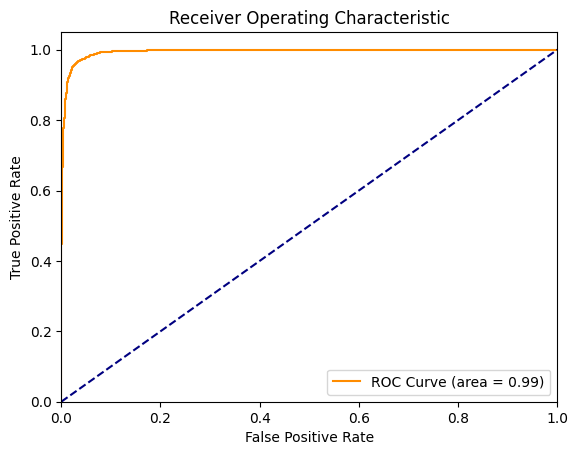

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
